In [42]:
import tensorflow as tf

# 기계 학습 문제 해결

- 훈련 데이터를 얻습니다.
- 모델을 정의하십시오.
- 손실 함수를 정의합니다.
- 훈련 데이터를 실행하여 이상적인 값에서 손실을 계산합니다.
- 손실에 대한 기울기를 계산하고 옵티 마이저를 사용하여 데이터에 맞게 변수를 조정합니다.
- 결과를 평가하십시오.

In [46]:
NUM_EXAMPLES = 1000
TRUE_W = 3.0
TRUE_B = 2.0
x = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
print("x.shape : ",x.shape)
print("noise.shape : ",noise.shape)
y = x*TRUE_W + TRUE_B + noise
print("y.shape : ",y.shape)

x.shape :  (1000,)
noise.shape :  (1000,)
y.shape :  (1000,)


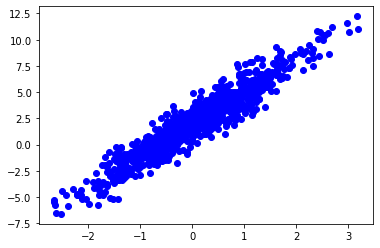

In [47]:
import matplotlib.pyplot as plt

plt.scatter(x,y,c="b")
plt.show()

# 모델 정의

In [48]:
# 모델 생성
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        print("MM __init__ Callback!!!")
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
        
    def __call__(self, x):
        print("MM __call__ Callback!!!")
        return self.w*x + self.b

model = MyModel() # 모델 인스턴트화
print("Variables:", model.variables) # 모델에 속한 변수에 대한 값을 튜플로 반환.
assert model(3.0).numpy() == 15.0 # 잘 동작하는지 확인.

MM __init__ Callback!!!
Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)
MM __call__ Callback!!!


In [50]:
# 손실 함수 생성 (mean square error)
def loss(target_y, predicted_y):
    print("loss function Callback!!!")
    return tf.reduce_mean(tf.square(target_y - predicted_y))

MM __call__ Callback!!!


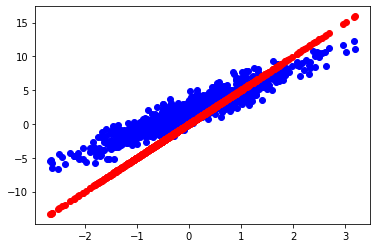

MM __call__ Callback!!!
loss function Callback!!!
Current loss : 8.008473


In [54]:
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()
print("Current loss : %1.6f" % loss(y, model(x)).numpy())

# 훈련 루프 정의

- 모델을 통해 입력 배치를 전송하여 출력 생성
- 출력을 출력 (또는 레이블)과 비교하여 손실 계산
- 그라디언트 테이프를 사용하여 그라디언트 찾기
- 이러한 그라디언트로 변수 최적화


In [79]:
def train(model, x, y, learning_rate):
    print("train Callback!!!")
    with tf.GradientTape() as t:
        print("loss 기울기 구하기!")
        current_loss = loss(y, model(x))
    dw, db = t.gradient(current_loss, [model.w, model.b]) # 기울기 미분 계산
    print("가중치 업데이트!")
    model.w.assign_sub(learning_rate * dw) # 업데이트
    model.b.assign_sub(learning_rate * db) # 업데이트

In [80]:
model = MyModel()

Ws, bs = [],[]
epochs = range(10)

def training_loop(model, x, y):
    print("training_loop Callback!!!")
    for epoch in epochs:
        train(model, x, y, learning_rate=0.1)
        print("Ws, bs append!!!")
        Ws.append(model.w.numpy())
        bs.append(model.b.numpy())        
        current_loss = loss(y, model(x))
        print("Epoch : {} W : {:.5f} b : {:.5f} loss : {:.5f}\n".format(epoch, Ws[-1], bs[-1], current_loss))

MM __init__ Callback!!!


MM __call__ Callback!!!
loss function Callback!!!
W : <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0> b : <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0> loss : 8.00847339630127

training_loop Callback!!!
train Callback!!!
loss 기울기 구하기!
MM __call__ Callback!!!
loss function Callback!!!
가중치 업데이트!
Ws, bs append!!!
MM __call__ Callback!!!
loss function Callback!!!
Epoch : 0 W : 4.66317 b : 0.37868 loss : 5.67413

train Callback!!!
loss 기울기 구하기!
MM __call__ Callback!!!
loss function Callback!!!
가중치 업데이트!
Ws, bs append!!!
MM __call__ Callback!!!
loss function Callback!!!
Epoch : 1 W : 4.38415 b : 0.68510 loss : 4.11310

train Callback!!!
loss 기울기 구하기!
MM __call__ Callback!!!
loss function Callback!!!
가중치 업데이트!
Ws, bs append!!!
MM __call__ Callback!!!
loss function Callback!!!
Epoch : 2 W : 4.15310 b : 0.93311 loss : 3.06866

train Callback!!!
loss 기울기 구하기!
MM __call__ Callback!!!
loss function Callback!!!
가중치 업데이트!
Ws, bs append!!!
MM __call__ Callback!!!
loss func

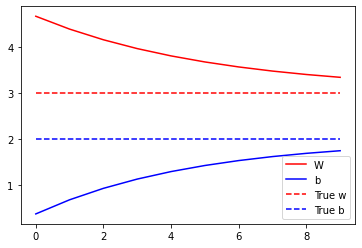

In [81]:
print("W : {} b : {} loss : {}\n".format(model.w, model.b, loss(y, model(x))))

training_loop(model, x, y)

plt.plot(epochs, Ws, "r", epochs, bs, "b")
plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")
plt.legend(["W", "b", "True w", "True b"])
plt.show()

MM __call__ Callback!!!


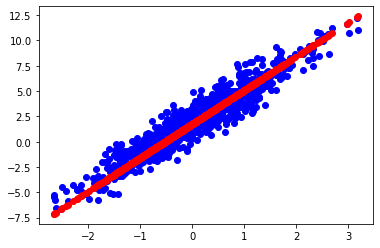

MM __call__ Callback!!!
loss function Callback!!!
Current loss: 1.078078


In [82]:
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()
print("Current loss: %1.6f" % loss(model(x), y).numpy())

# 위의 솔루션을 Keras로

In [86]:
class MyModelKeras(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    
    def call(self, x):
        return self.w*x + self.b

keras_model = MyModelKeras()
training_loop(keras_model, x, y)
keras_model.save_weights("/content/drive/MyDrive/Study/01_tensorflow/Tensorflow_tutorial/my_checkpoint")

training_loop Callback!!!
train Callback!!!
loss 기울기 구하기!
loss function Callback!!!
가중치 업데이트!
Ws, bs append!!!
loss function Callback!!!
Epoch : 0 W : 4.66317 b : 0.37868 loss : 5.67413

train Callback!!!
loss 기울기 구하기!
loss function Callback!!!
가중치 업데이트!
Ws, bs append!!!
loss function Callback!!!
Epoch : 1 W : 4.38415 b : 0.68510 loss : 4.11310

train Callback!!!
loss 기울기 구하기!
loss function Callback!!!
가중치 업데이트!
Ws, bs append!!!
loss function Callback!!!
Epoch : 2 W : 4.15310 b : 0.93311 loss : 3.06866

train Callback!!!
loss 기울기 구하기!
loss function Callback!!!
가중치 업데이트!
Ws, bs append!!!
loss function Callback!!!
Epoch : 3 W : 3.96183 b : 1.13391 loss : 2.36950

train Callback!!!
loss 기울기 구하기!
loss function Callback!!!
가중치 업데이트!
Ws, bs append!!!
loss function Callback!!!
Epoch : 4 W : 3.80354 b : 1.29652 loss : 1.90126

train Callback!!!
loss 기울기 구하기!
loss function Callback!!!
가중치 업데이트!
Ws, bs append!!!
loss function Callback!!!
Epoch : 5 W : 3.67257 b : 1.42824 loss : 1.58752

train Ca

In [91]:
keras_model = MyModelKeras()

keras_model.compile(
    run_eagerly=False,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss=tf.keras.losses.mean_squared_error
)

In [98]:
print(x.shape[0])
keras_model.fit(x, y, epochs=10, batch_size=1000)

1000
Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 0.9748
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.9651
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.9589
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.9550
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 0.9525
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.9509
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.9499
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.9493
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 0.9489
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 0.9486
